Thymio mini project

In [1]:
!pip install --upgrade tdmclient

In [2]:
# import libraries
import time
from tdmclient import ClientAsync
import numpy as np
import math

# import project files
import constants as cst
import vision
import global_navigation as gn
#import local_navigation as ln
import extended_Kalman_filter as eKf
import geometry as geo

#connect to the robot
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

-1.5707963267948966


Node 328bdb70-11b8-49f9-b631-ac6519113084

In [3]:
await node.set_variables({
            'leds.bottom.left': [0, 0, 0],
            'leds.bottom.right': [0, 0, 0],
            'leds.circle': [0, 0, 0, 0, 0, 0, 0, 0],
            'leds.top': [0, 0, 0],
        })

In [4]:
# Set the motor speeds
async def stop_robot():
    """
    Stop the robot. Set the motor speed of each wheel to zero.
    """
    await node.set_variables({
            "motor.right.target": [0],
            "motor.left.target": [0],
        })

async def move_robot(right_speed, left_speed):
    """
    Turn the robot wheels to the given speeds.
    Parameter: - right_speed   : right wheel speed in [thymio speed]
               - left_speed    : left wheel speed in [thymio speed]
    """
    await node.set_variables({
            "motor.right.target": [right_speed],
            "motor.left.target": [left_speed],
        })

In [5]:
# Get the proximity sensor values
async def get_prox_sensors():
    """
    Get the sensor measurements of a the proximity sensors.
    Returns: - prox_sensors    : numpy array of fron proximity sensors measurements
             - detected        : boolean, true if any sensors measured a higher value than threshold
    """
    
    await node.wait_for_variables({str('prox.horizontal')})
    prox_sensors = np.asarray(list(node['prox.horizontal']))
    prox_sensors = prox_sensors[0:5]

    prox_sensors_bool = (prox_sensors >= np.ones(5) * 20) #cst.THRESHOLD_PROX_SENSOR
    detected = False
    if(any(prox_sensors_bool)):
        detected = True

    return prox_sensors, detected

# Get the motor speed measurement values
async def get_motor_speed_meas():
    """
    Get the motor speed measurements
    Returns: - speed_left_meas    : left wheel speed in [thymio speed]
             - speed_right_meas   : right wheel speed in [thymio speed]
    """
    
    await node.wait_for_variables({str('motor.right.speed')})
    speed_right_meas = node['motor.right.speed']
    await node.wait_for_variables({str('motor.left.speed')})
    speed_left_meas = node['motor.left.speed']

    return speed_right_meas, speed_left_meas

In [6]:
# test thymio
# move the robot forward and get prox values.
await move_robot(50, 50)
dt = 0
old_time = time.time()
while(dt < 2):
    y,d = await get_prox_sensors()
    print(y)
    print(d)
    await client.sleep(0.1)
    dt = time.time() - old_time
await stop_robot()

[0 0 0 0 0]
False
[0 0 0 0 0]
False
[0 0 0 0 0]
False
[0 0 0 0 0]
False
[0 0 0 0 0]
False
[0 0 0 0 0]
False
[0 0 0 0 0]
False
[0 0 0 0 0]
False
[0 0 0 0 0]
False
[0 0 0 0 0]
False
[0 0 0 0 0]
False
[0 0 0 0 0]
False
[0 0 0 0 0]
False
[0 0 0 0 0]
False
[0 0 0 0 0]
False
[0 0 0 0 0]
False
[0 0 0 0 0]
False
[0 0 0 0 0]
False
[0 0 0 0 0]
False


Coordonnées obstacles noirs : [[(763, 781), (1035, 781), (1035, 321), (763, 321)]]
Centroid de la goal area : [1515.  542.]
Vecteur direction du robot : 108 -21
Centroid du robot : [345 576]


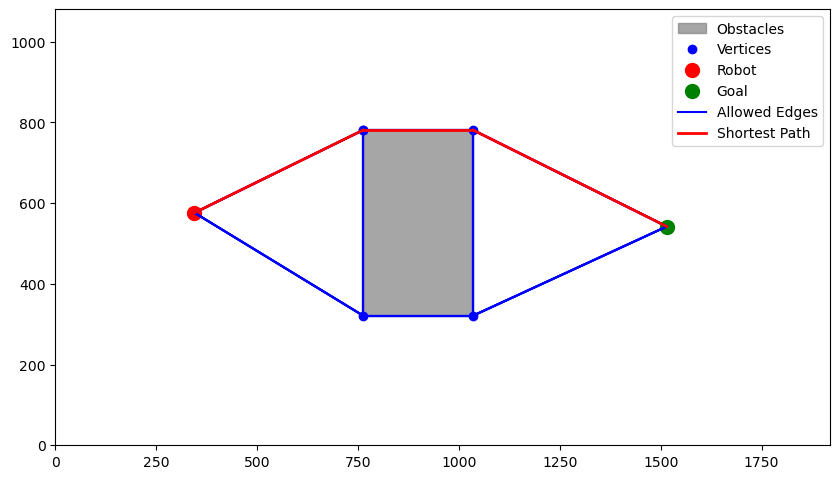

glob nav path : [(345.0, 576.0), (763.0, 781.0), (1035.0, 781.0), (1515.0, 542.0)]
(18, 31)
[(18, 31), (41, 42), (55, 42), (81, 29)]


In [7]:
#VISION AND GLOBAL NAVIGATION
obstacles, goal_centroid = vision.vision_obstacles_and_goal()
robot_centroid, robot_direction = vision.vision_robot()

merge_need = True
visualize = True
shortest_path, obstacles = gn.global_navigation(tuple(robot_centroid), obstacles, tuple(goal_centroid), merge_need, visualize)
print("glob nav path :", shortest_path)


def pixels_to_cm(coordinates, pixel_to_cm_ratio=0.05406):
    # Convert each coordinate in the list or individual point
    if isinstance(coordinates[0], (list, tuple)):
        # List of coordinates
        converted_coordinates = [
            (int(x * pixel_to_cm_ratio), int(y * pixel_to_cm_ratio)) for x, y in coordinates
        ]
    else:
        # Single coordinate
        converted_coordinates = (int(coordinates[0] * pixel_to_cm_ratio), int(coordinates[1] * pixel_to_cm_ratio))
    
    return converted_coordinates



shortest_path = pixels_to_cm(shortest_path)


robot_centroid = pixels_to_cm(robot_centroid)
print(robot_centroid)
print(shortest_path)

#obstacles = np.array(obstacles)

1 rotation
[-0.19204802] [0.44610555] [0.63815357]
[(41, 42), (55, 42), (81, 29)]
2 rotation
[-0.11089926] [0.66749408] [0.77839334]
[(41, 42), (55, 42), (81, 29)]
3 rotation
[0.03092211] [0.70357896] [0.67265686]
[(41, 42), (55, 42), (81, 29)]
4 rotation
[0.19840361] [0.7120087] [0.5136051]
[(41, 42), (55, 42), (81, 29)]
5 rotation
[0.37333412] [0.71417804] [0.34084392]
[(41, 42), (55, 42), (81, 29)]
6 rotation
[0.55434302] [0.71459121] [0.1602482]
[(41, 42), (55, 42), (81, 29)]
7 rotation
[0.73912746] [0.71453003] [-0.02459743]
[(41, 42), (55, 42), (81, 29)]
8 translation
Error: [19.19998588]
9 translation
Error: [18.993907]
10 translation
Error: [18.45001643]
11 translation
Error: [17.75434957]
12 translation
Error: [16.9892588]
13 translation
Error: [16.19543534]
14 translation
Error: [15.39024548]
15 translation
Error: [14.59389848]
16 translation
Error: [13.82350212]
17 translation
Error: [13.0686277]
18 translation
Error: [12.32504349]
19 translation
Error: [11.57630269]
20 tran

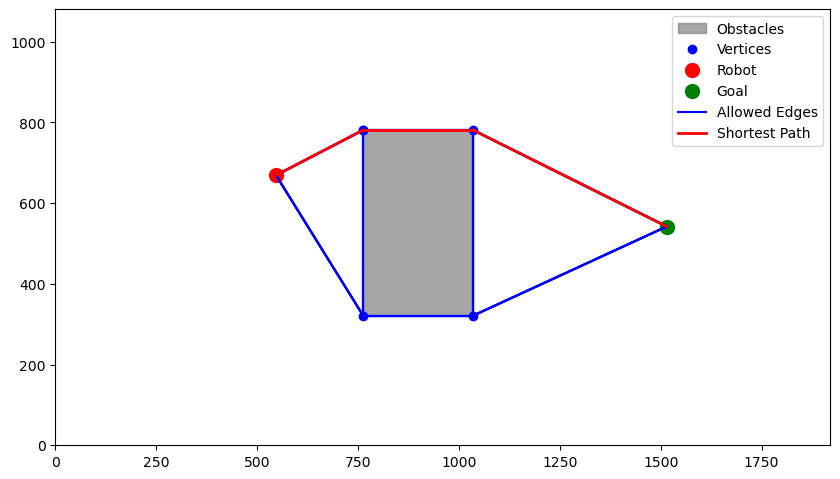

glob nav path : [(547.0, 669.0), (763.0, 781.0), (1035.0, 781.0), (1515.0, 542.0)]
(29, 36)
[(29, 36), (41, 42), (55, 42), (81, 29)]
26 rotation
Kalman:  36.3016957213665 43.83410564417864 0.9933197344684609 1.9606316987174088 1.935432469112105
[0.99331973] [-0.09777662] [-1.09109636]
[(55, 42), (81, 29)]
27 rotation
[0.92504181] [-0.12249302] [-1.04753483]
[(55, 42), (81, 29)]
28 rotation
[0.79481283] [-0.13293839] [-0.92775122]
[(55, 42), (81, 29)]
29 rotation
[0.63292009] [-0.13638415] [-0.76930424]
[(55, 42), (81, 29)]
30 rotation
[0.45823209] [-0.13813769] [-0.59636978]
[(55, 42), (81, 29)]
31 rotation
[0.27736091] [-0.13891603] [-0.41627695]
[(55, 42), (81, 29)]
32 rotation
[0.07525711] [-0.14099561] [-0.21625272]
[(55, 42), (81, 29)]
33 rotation
[-0.12561599] [-0.14183536] [-0.01621937]
[(55, 42), (81, 29)]
34 translation
Error: [18.30272076]
35 translation
Error: [18.06397597]
36 translation
Error: [17.48810552]
37 translation
Error: [16.77700994]
38 translation
Error: [16.0155

/Users/benoitgallois/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/benoitgallois/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/benoitgallois/Desktop/EPFL/MA3/Mobile Robotics/Projet - Vision/Code_test/vision.py:73: RuntimeWarning: invalid value encountered in cast
  direction = (front_centroid - back_centroid).astype(int)
/Users/benoitgallois/Desktop/EPFL/MA3/Mobile Robotics/Projet - Vision/Code_test/vision.py:74: RuntimeWarning: invalid value encountered in cast
  midpoint = ((front_centroid + back_centroid) / 2).astype(int)


Vecteur direction du robot : 0 0
Centroid du robot : [0 0]
Vecteur direction du robot : 86 -58
Centroid du robot : [754 618]
camera measurements:  [754 618] -0.5933501461567182


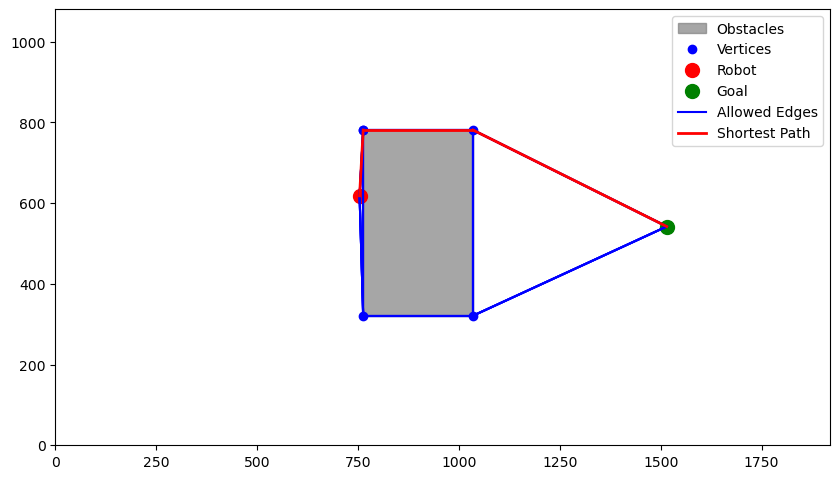

glob nav path : [(754.0, 618.0), (763.0, 781.0), (1035.0, 781.0), (1515.0, 542.0)]
(40, 33)
[(40, 33), (41, 42), (55, 42), (81, 29)]
53 rotation
Kalman:  56.26426574500186 37.210362497305745 -0.31306580541904855 1.461398613774136 1.2507146214043994
[-0.31306581] [-0.32048084] [-0.00741504]
[(81, 29)]
54 translation
Error: [26.58260316]
55 translation
Error: [26.00338568]
56 translation
Error: [25.34378282]
57 translation
Error: [24.56541375]
58 translation
Error: [23.7510155]
59 translation
Error: [22.93695885]
60 translation
Error: [22.13768167]
61 translation
Error: [21.35353759]
62 translation
Error: [20.55608924]
63 translation
Error: [19.73553924]
64 translation
Error: [18.90502121]
65 translation
Error: [18.066643]
66 translation
Error: [17.24037769]
67 translation
Error: [16.43370021]
68 translation
Error: [15.61740374]
69 translation
Error: [14.80139197]
70 translation
Error: [13.99548984]
71 translation
Error: [13.17757442]
72 translation
Error: [12.35507253]
73 translation
Er

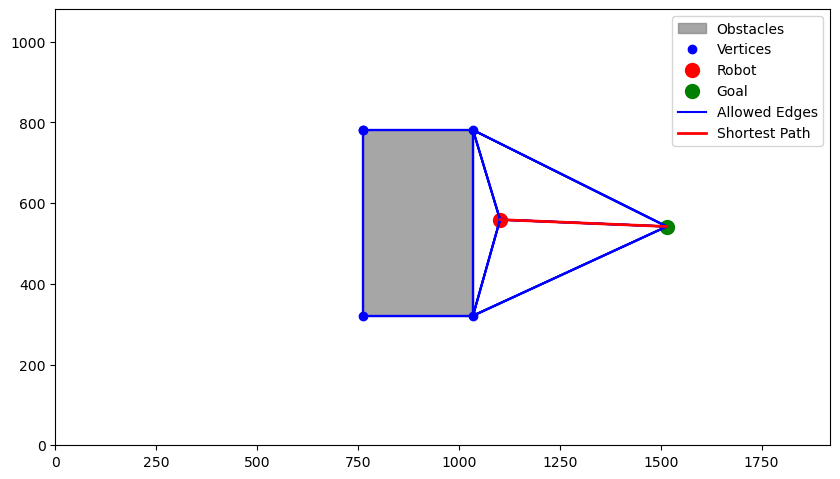

glob nav path : [(1102.0, 559.0), (1515.0, 542.0)]
(59, 30)
[(59, 30), (81, 29)]
82 rotation
stop robot


In [8]:
#ROBOT CONTROL AND LOCALISATION

# state variables
global_state = 'rotation'

#speed_correction = 12.5 #calibration cst for rotation counterclockwise
speed_correction = 14 #calibration cst for rotation counterclockwise
#speed_correction = 0.75 #0.65 #calibration cst for translation

intermediate_goals = shortest_path
intermediate_goals.pop(0)
robot = [(robot_centroid[0],robot_centroid[1])]
robot_orientation = np.arctan2(robot_direction[1], robot_direction[0])

#intermediate_goals = [(0, 10), (-10, 10), (-10, 0), (0,0)]
#intermediate_goals = [(56, 34), (66, 34), (87, 26)]
#robot = [(34.0,28.0)]
#robot_orientation = 1.6
robot_speed = [0.0,0.0]

Kfilter = eKf.Kalman(robot[0][0], robot[0][1], robot_orientation)

#robot_speed = [30, -30] #robot speed for rotation (counterclockwise)
#robot_speed = [-30, 30] #robot speed for rotation (clockwise)
#robot_speed = [50, 50] #robot speed for translation
#await move_robot(robot_speed[0], robot_speed[1])

old_time = 0.0
printkal = False
iter = 0
while(True):
    iter = iter + 1
    print(iter, global_state)

    if intermediate_goals == []:
        await stop_robot()
        print("stop robot")
        break

    
    speed_right_meas, speed_left_meas = await get_motor_speed_meas()
    #print(speed_right_meas, speed_left_meas, "  ", robot_speed[0], robot_speed[1])
    speed_right_meas = speed_right_meas * speed_correction
    speed_left_meas = speed_left_meas * speed_correction
    
    #speed_right_meas = robot_speed[0] * speed_correction
    #speed_left_meas = robot_speed[1] * speed_correction

    Kfilter.measurement_wheels(speed_right_meas / 18.1818, speed_left_meas / 18.1818)

    if iter == 0:                   # first time
        old_time = time.time()
    dt = time.time() - old_time     # get time difference for Kalman
    old_time = time.time()

    Kfilter.dt_update(dt)
    Kfilter.Kalman_filter()
    #print(dt, time.time(), old_time)
    if printkal:
        print("Kalman: ", Kfilter.Mu[0][0], Kfilter.Mu[1][0], Kfilter.Mu[2][0], Kfilter.Mu[3][0], Kfilter.Mu[4][0])
        printkal = False
    #print("Kalman Sigma: ", Kfilter.Sigma)
    #print("Kalman y: ", Kfilter.y)
    
    robot.append((Kfilter.Mu[0][0], Kfilter.Mu[1][0]))
    
    if global_state == 'rotation':
        angle = np.arctan2(intermediate_goals[0][1] - Kfilter.Mu[1], intermediate_goals[0][0] - Kfilter.Mu[0]) - Kfilter.Mu[2]
        angle = geo.center_angle(angle)
        print(Kfilter.Mu[2], np.arctan2(intermediate_goals[0][1] - Kfilter.Mu[1], intermediate_goals[0][0] - Kfilter.Mu[0]), angle)
        print(intermediate_goals)
        if(abs(angle) < 0.08):
            await stop_robot()
            global_state = 'translation'
            continue
        
        ###########################################
        ###########################################
        #if(angle > 0):
        #    robot_speed = [30, -30]         # counterclockwise
        #    speed_correction = 2 #32 #14
        #else:
        #    robot_speed = [-30, 30]         # clockwise
        #    speed_correction = 2 #12.5
        
        P_value_rotation = 30.0 / (math.pi)     #test with 40.0 or 50.0 / math.pi

        # angle > 0 => counterclockwise ; angle < 0 => clockwise
        robot_speed = [P_value_rotation*angle, -P_value_rotation*angle]
        speed_correction = 1.0 #32 #14
        ###########################################
        ###########################################  


    elif global_state == 'translation':
        
        print("Error:", np.sqrt((intermediate_goals[0][0] - Kfilter.Mu[0])**2 + (intermediate_goals[0][1] - Kfilter.Mu[1])**2))
        #if(np.sqrt(Kfilter.Mu[0][0]**2 + Kfilter.Mu[1][0]**2) > 10.0):     #translation condition
        Error_translation = np.sqrt((intermediate_goals[0][0] - Kfilter.Mu[0])**2 + (intermediate_goals[0][1] - Kfilter.Mu[1])**2)

        if Error_translation <= 6:
            print("je m'arrete")
            await stop_robot()
            #intermediate_goals.pop(0)
            global_state = 'camera'
            continue
        
        angle = np.arctan2(intermediate_goals[0][1] - Kfilter.Mu[1], intermediate_goals[0][0] - Kfilter.Mu[0]) - Kfilter.Mu[2]
        angle = geo.center_angle(angle)
        #P_control_translation = 5 / (math.pi / 4.0)
        #robot_speed = [50 + int(P_control_translation*angle), 50 - int(P_control_translation*angle)]
        #speed_correction = 0.75
        ###########################################
        ###########################################
        P_control_translation = 50.0 / 30.0
        robot_speed = [int(P_control_translation*Error_translation), int(P_control_translation*Error_translation)]
        speed_correction = 0.75
        ###########################################
        ###########################################
        
        
    elif global_state == 'camera':
        robot_centroid = [0,0]
        while robot_centroid[0] == 0 and robot_centroid[1] == 0:
            robot_centroid, robot_direction = vision.vision_robot()
            
        #robot_centroid = pixels_to_cm(robot_centroid) #changer pixel
        robot_angle = np.arctan2(robot_direction[1], robot_direction[0])    
        #Kfilter.measurement_position(robot_centroid[0], robot_centroid[1], robot_angle)
        #print("Kalman: ", Kfilter.Mu[0][0], Kfilter.Mu[1][0], Kfilter.Mu[2][0], Kfilter.Mu[3][0], Kfilter.Mu[4][0])
        global_state = 'rotation'
        print("camera measurements: ", robot_centroid, robot_angle)
        printkal = True
        
        #obstacles, goal_centroid = vision.vision_obstacles_and_goal()
        #robot_centroid, robot_direction = vision.vision_robot()            
            
        merge_need = True
        visualize = True
        shortest_path, obstacles = gn.global_navigation(tuple(robot_centroid), obstacles, tuple(goal_centroid), merge_need, visualize)
        print("glob nav path :", shortest_path)

        shortest_path = pixels_to_cm(shortest_path)

        robot_centroid = pixels_to_cm(robot_centroid)
        
        intermediate_goals.pop(0)
        
        print(robot_centroid)
        print(shortest_path)

        
        
        continue
        
    await move_robot(robot_speed[0], robot_speed[1])
    await client.sleep(0.3)


    

In [9]:
await stop_robot()

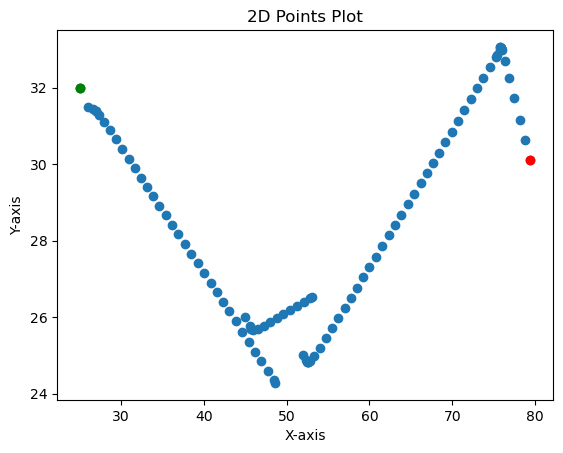

[(25, 32), (25.00000000001986, 31.99999999999874), (25.9672132907485, 31.503707613497276), (26.670575866527162, 31.44135231727119), (26.97308155645252, 31.397191413092294), (27.016323469672862, 31.376599080617094), (27.373852392809802, 31.289772250141745), (27.969167224385686, 31.108270396652678), (28.66081705635458, 30.88374317746476), (29.400070910576627, 30.642012780924667), (30.15239997296375, 30.39389991290144), (30.916218000221527, 30.14275476319224), (31.672337816821, 29.89113684591478), (32.41568748950998, 29.64449288145279), (33.154530403048426, 29.40193030407535), (33.89206009218986, 29.162322031364113), (34.64683021011187, 28.91527389089108), (35.41622558994967, 28.663595007863744), (36.18351455586227, 28.412183853031294), (36.94082734406697, 28.166101206262116), (37.70433048685202, 27.917279110242493), (38.479858283216004, 27.66217389028651), (39.264465736413335, 27.40858516418547), (40.04543356712341, 27.15534708262837), (40.8200132086329, 26.900066352006696), (41.57752545

In [10]:
import matplotlib.pyplot as plt

# Unpack the tuples into separate lists for x and y coordinates
x_coords, y_coords = zip(*robot)

# Plot the points
plt.scatter(x_coords, y_coords)
plt.scatter(robot[0][0], robot[0][1], color = "green")
plt.scatter(robot[-1][0], robot[-1][1], color = "red")

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Points Plot')

# Display the plot
plt.show()
print(robot)